In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/BamlakHun/Diamond/refs/heads/main/diamond.csv")

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [9]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [11]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


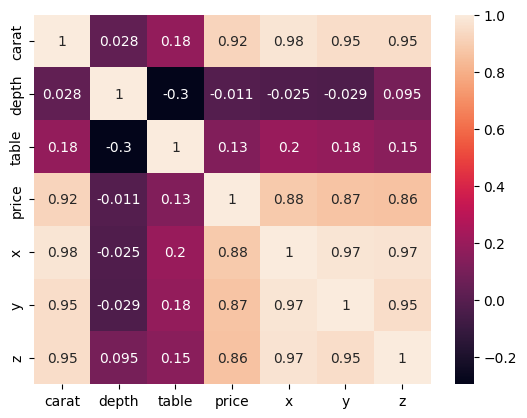

In [24]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Now calculate the correlation matrix
sns.heatmap(df_numeric.corr(), annot=True);


In [25]:
df['symmetry'] = df['x']/df['y']
df.head()

,carat,depth,table,price,x,y,z,cut_0,cut_1,cut_2,...,color_6,clarity_0,clarity_1,clarity_2,clarity_3,clarity_4,clarity_5,clarity_6,clarity_7,symmetry
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,True,False,False,False,False,0.992462
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,True,False,False,False,False,False,1.013021
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,False,...,False,False,False,False,False,True,False,False,False,0.995086
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,False,False,False,False,False,False,True,False,False,0.992908
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,True,False,False,False,True,False,False,False,False,0.997701


In [26]:
df = df.dropna(axis=0)

In [27]:
df_trans=pd.get_dummies(df)
X = df_trans.drop(['price','x','y','z'],axis=1)
y=df_trans['price']
features = X.columns

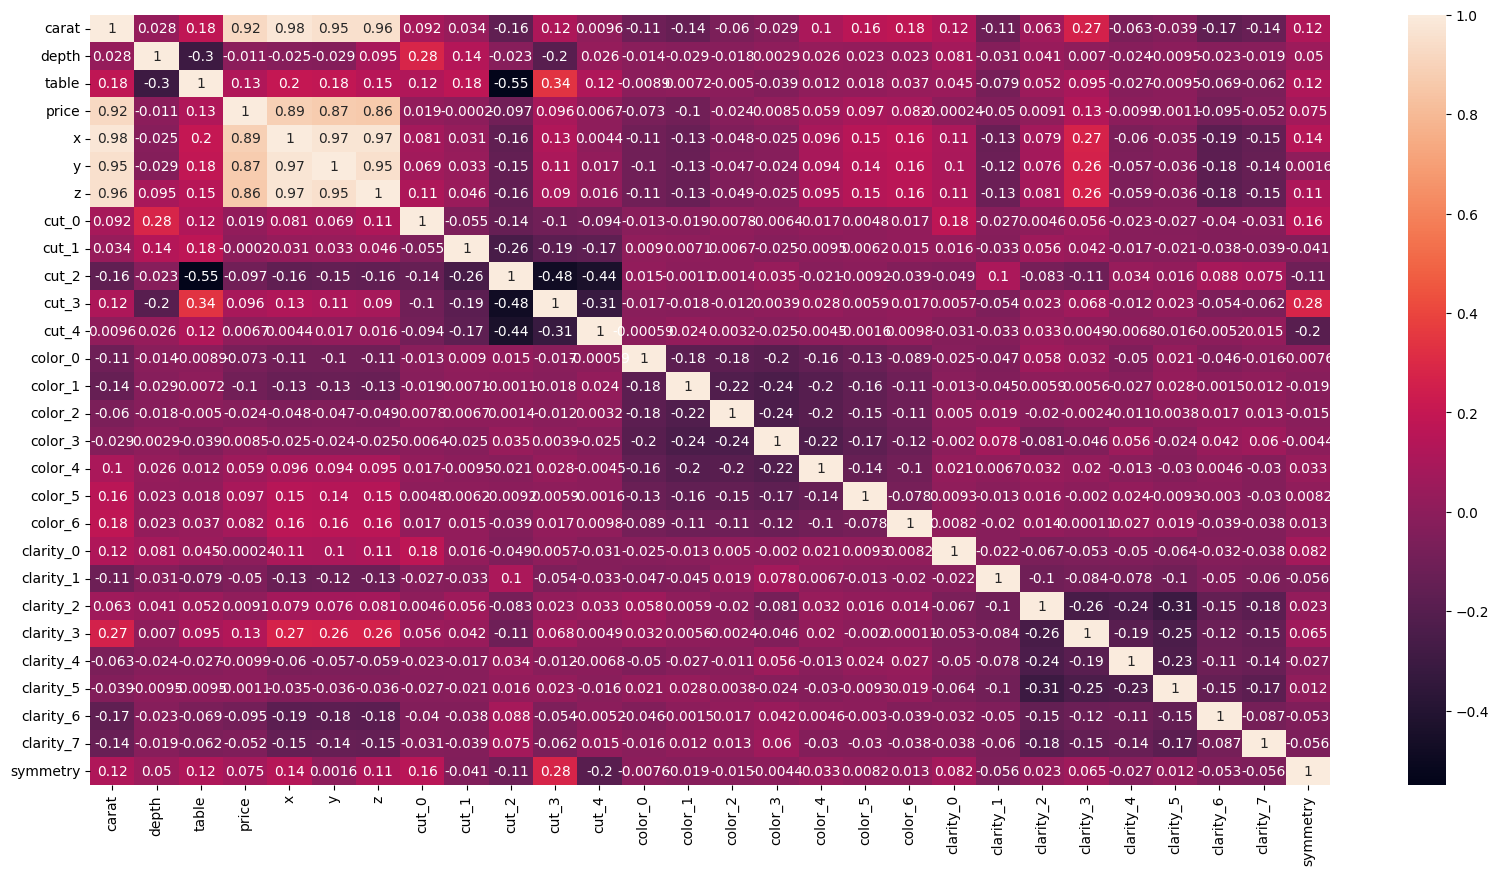

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(df_trans.corr(),annot=True);

In [29]:
s = StandardScaler()
X = s.fit_transform(X)

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [33]:
models_eval = pd.DataFrame(index=['Null','KNN','MLR'],columns=['RMSE'])

In [34]:
ypred_null = y_train.mean()

In [35]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [36]:
y_pred = knn.predict(X_test)

In [37]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train,y_train)
y_pred2=y_pred = rf.predict(X_test)

In [38]:
lin = LinearRegression()
lin = lin.fit(X_train,y_train)
y_pred3 = lin.predict(X_test)

In [39]:
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred4 = lasso.predict(X_test)

In [40]:
model_eval=pd.DataFrame(index=['KNN','MLR'],columns=['RMSE'])
model_eval.loc['KNN','RMSE']=np.sqrt(mean_squared_error(y_test,y_pred))
model_eval.loc['RF','RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred2))
model_eval.loc['MLR','RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred3))
model_eval.loc['Lasso','RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred4))
model_eval.loc['NULL','RMSE'] = ypred_null
model_eval

,RMSE
KNN,572.474433
MLR,1143.215985
RF,572.474433
Lasso,1143.184535
NULL,3924.163861


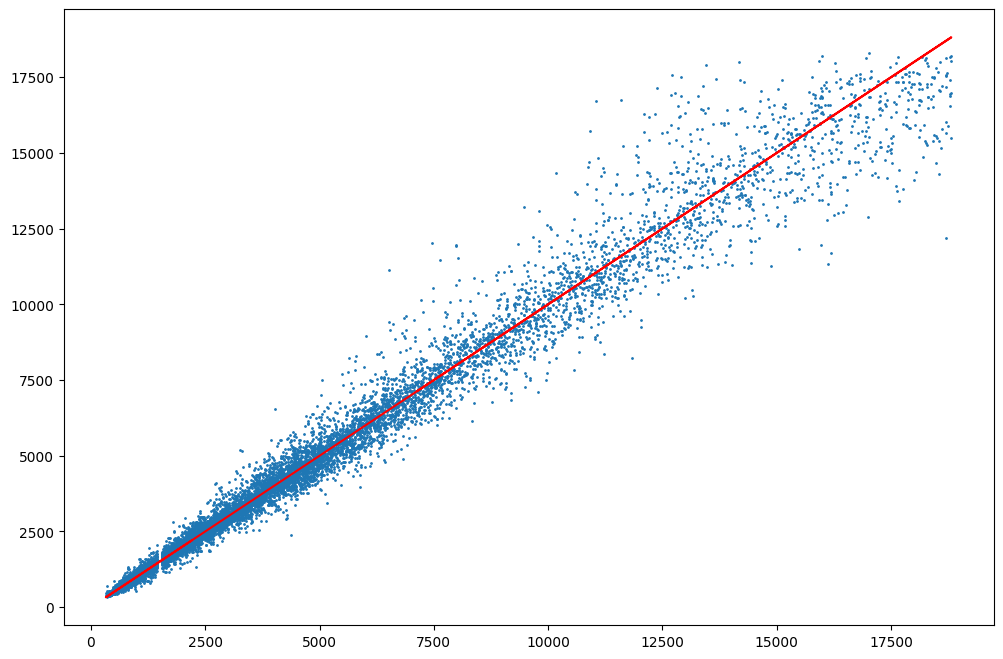

In [41]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(y_test,y_pred,s=1)
ax.plot(y_test,y_test,color='red')

C:\Users\46793\AppData\Local\Temp\ipykernel_10176\3524681940.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred-y_test)


<Axes: xlabel='price', ylabel='Density'>

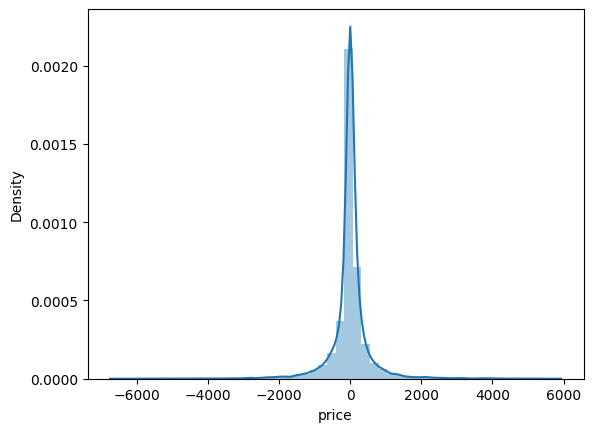

In [42]:
sns.distplot(y_pred-y_test)

In [43]:
lin=LinearRegression()
lin.fit(X_train,y_train)
y_pred2 = lin.predict(X_test)
model_eval.loc['MLR','RMSE']=np.sqrt(mean_squared_error(y_pred2,y_test))

In [44]:
from sklearn.ensemble import ExtraTreesRegressor
model =ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [46]:
model.feature_importances_.tolist()

[0.8820783854015611,
 0.00406741242701324,
 0.003944062672360977,
 0.001152862159092959,
 0.0006452478573032944,
 0.002289249729770074,
 0.0009000294652815929,
 0.0005178051594459165,
 0.003457595274457254,
 0.003507993791344334,
 0.0017298174509752563,
 0.0030274613892769583,
 0.006526645408090257,
 0.008439992259619335,
 0.010301698177247076,
 0.015144762027077326,
 0.002509020776211946,
 0.012556539727657082,
 0.016869820618978813,
 0.004644499253520155,
 0.005770635042442038,
 0.002190735866878177,
 0.002921389792687918,
 0.004806338271706888]